<a href="https://colab.research.google.com/github/EsraaaMohammed/Assignment2/blob/main/CartPole_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q stable-baselines3[extra] gym matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 839.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 15.2 MB/s eta 0:00:00



Training model with 1000 timesteps...


/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Timesteps: 1000 | Mean reward: 9.00, Std: 0.63

Training model with 5000 timesteps...
Timesteps: 5000 | Mean reward: 9.80, Std: 0.40

Training model with 10000 timesteps...
Timesteps: 10000 | Mean reward: 25.60, Std: 8.53

Training model with 20000 timesteps...
Timesteps: 20000 | Mean reward: 17.00, Std: 3.38

Training model with 50000 timesteps...
Timesteps: 50000 | Mean reward: 284.90, Std: 81.33


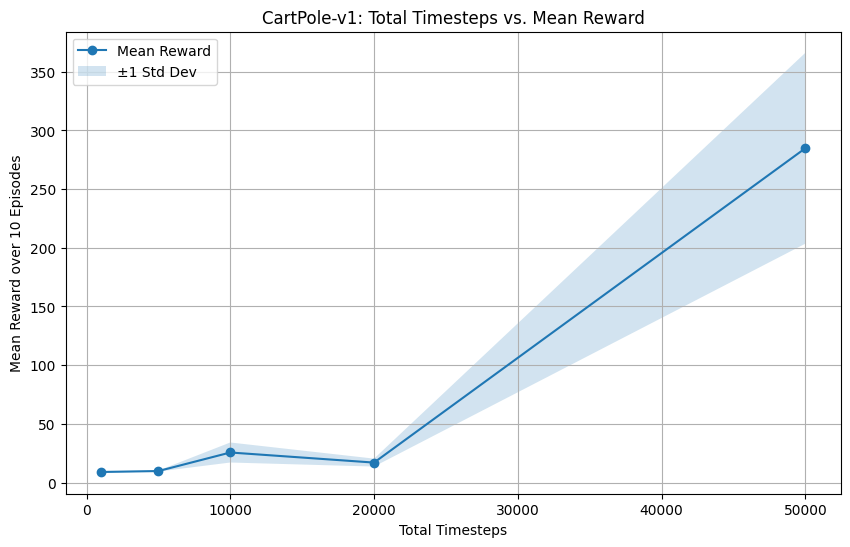

In [ ]:
# Compatibility fix for newer numpy + gymnasium versions
import numpy as np
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

import gym
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_vec_env

# Custom evaluation function (handles Gymnasium changes)
def evaluate_model(model, env, num_episodes=10):
    rewards = []
    for _ in range(num_episodes):
        result = env.reset()
        obs = result[0] if isinstance(result, tuple) else result
        done = False
        total_reward = 0
        while not done:
            action, _ = model.predict(obs, deterministic=True)
            result = env.step(action)
            if len(result) == 5:
                obs, reward, terminated, truncated, _ = result
                done = terminated or truncated
            else:
                obs, reward, done, _ = result
            total_reward += reward
        rewards.append(total_reward)
    return np.mean(rewards), np.std(rewards)

    # Configuration
env_id = "CartPole-v1"
timesteps_list = [1000, 5000, 10000, 20000, 50000]
mean_rewards = []
std_rewards = []

# Train and evaluate models
for t in timesteps_list:
    print(f"\nTraining model with {t} timesteps...")
    env = make_vec_env(env_id, n_envs=1)
    model = DQN("MlpPolicy", env, verbose=0)
    model.learn(total_timesteps=t)

    eval_env = gym.make(env_id, render_mode=None)
    mean_reward, std_reward = evaluate_model(model, eval_env)
    mean_rewards.append(mean_reward)
    std_rewards.append(std_reward)

    print(f"Timesteps: {t} | Mean reward: {mean_reward:.2f}, Std: {std_reward:.2f}")

    #Plot performance
plt.figure(figsize=(10, 6))
plt.plot(timesteps_list, mean_rewards, marker='o', label="Mean Reward")
plt.fill_between(timesteps_list,
                 np.array(mean_rewards) - np.array(std_rewards),
                 np.array(mean_rewards) + np.array(std_rewards),
                 alpha=0.2, label="±1 Std Dev")
plt.xlabel("Total Timesteps")
plt.ylabel("Mean Reward over 10 Episodes")
plt.title("CartPole-v1: Total Timesteps vs. Mean Reward")
plt.grid(True)
plt.legend()
plt.show()

In [4]:
# Retrain and save best model
best_idx = np.argmax(mean_rewards)
best_timesteps = timesteps_list[best_idx]
print(f"\nBest performing model: {best_timesteps} timesteps (Mean Reward: {mean_rewards[best_idx]:.2f})")

best_env = make_vec_env(env_id, n_envs=1)
best_model = DQN("MlpPolicy", best_env, verbose=0)
best_model.learn(total_timesteps=best_timesteps)
best_model.save("best_dqn_cartpole")

print("Best model saved as 'best_dqn_cartpole.zip'")


Best performing model: 50000 timesteps (Mean Reward: 284.90)
Best model saved as 'best_dqn_cartpole.zip'
